<a href="https://colab.research.google.com/github/JRzo/Data_Analytics_Projects/blob/main/Olympics2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
We gonna focus on 5 sports of the olympics:
  1. Baseketball (W&M)
  2. Futboll (W&M)
  3. Shooting
  4. Gymnasstics
  5. Tracking


 """

'\nWe gonna focus on 5 sports of the olympics:\n  1. Baseketball (W&M)\n  2. Futboll (W&M)\n  3. Shooting\n  4. Gymnasstics\n  5. Tracking\n\n\n '

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.cbook as cbook

data  = pd.read_csv("/content/Basketball.csv")
data.head()

,date,stage_code,event_code,event_name,event_stage,stage,stage_status,gender,discipline_name,discipline_code,venue,participant_code,participant_name,participant_type,participant_country_code,participant_country,result,result_type,result_WLT,start_order
0,2024-07-27T12:56:50+02:00,BKBMTEAM5-------------GPA-000100--,BKBMTEAM5,Men,Men's Group Phase - Group A,Group Phase - Group A,FINISHED,M,Basketball,BKB,Pierre Mauroy Stadium,BKBMTEAM5---AUS01,Australia,Team,AUS,Australia,92,POINTS,W,1
1,2024-07-27T12:56:50+02:00,BKBMTEAM5-------------GPA-000100--,BKBMTEAM5,Men,Men's Group Phase - Group A,Group Phase - Group A,FINISHED,M,Basketball,BKB,Pierre Mauroy Stadium,BKBMTEAM5---ESP01,Spain,Team,ESP,Spain,80,POINTS,L,2
2,2024-07-27T15:13:15+02:00,BKBMTEAM5-------------GPB-000100--,BKBMTEAM5,Men,Men's Group Phase - Group B,Group Phase - Group B,FINISHED,M,Basketball,BKB,Pierre Mauroy Stadium,BKBMTEAM5---GER01,Germany,Team,GER,Germany,97,POINTS,W,1
3,2024-07-27T15:13:15+02:00,BKBMTEAM5-------------GPB-000100--,BKBMTEAM5,Men,Men's Group Phase - Group B,Group Phase - Group B,FINISHED,M,Basketball,BKB,Pierre Mauroy Stadium,BKBMTEAM5---JPN01,Japan,Team,JPN,Japan,77,POINTS,L,2
4,2024-07-27T19:20:21+02:00,BKBMTEAM5-------------GPB-000200--,BKBMTEAM5,Men,Men's Group Phase - Group B,Group Phase - Group B,FINISHED,M,Basketball,BKB,Pierre Mauroy Stadium,BKBMTEAM5---FRA01,France,Team,FRA,France,78,POINTS,W,1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data.head()

# Acesnding from top-low group A
teams_score_average = data.groupby("gender")["result"].value_counts().sort_values(ascending=False)
record_teams = data.groupby("participant_country")["result_WLT"].value_counts().sort_values(ascending=False)

# print(f'\n Highest score game {Highest_score_team.sort_values(ascending=False)} ')



print(f"\n Average Score for each team")
scores = pd.Series(data.groupby("participant_country")["result"].mean())

print(scores)



 Average Score for each team
participant_country
Australia        77.333333
Belgium          76.400000
Brazil           82.000000
Canada           75.571429
China            76.000000
France           78.500000
Germany          78.888889
Greece           74.000000
Japan            74.833333
Nigeria          70.500000
Puerto Rico      67.166667
Serbia           82.333333
South Sudan      87.000000
Spain            76.857143
United States    98.300000
Name: result, dtype: float64


In [ ]:
# Woman

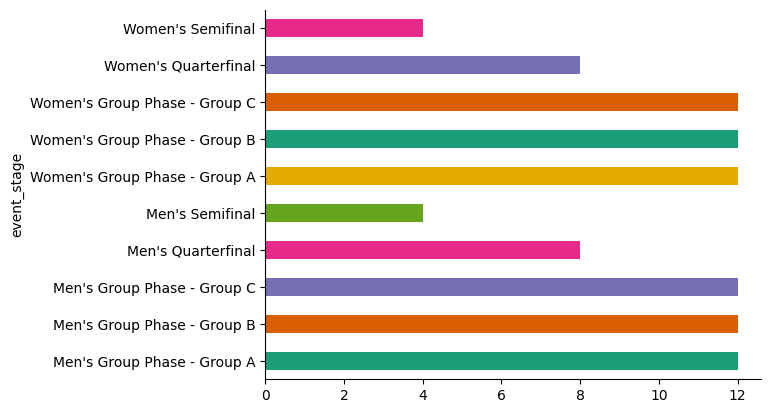

In [4]:
# @title Male & Woman points by each stage.

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('event_stage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

{('China', 'W'): 1, ('Greece', 'W'): 1, ('Brazil', 'W'): 1, ('South Sudan', 'W'): 1, ('Nigeria', 'W'): 2, ('South Sudan', 'L'): 2, ('Belgium', 'W'): 2, ('China', 'L'): 2, ('Nigeria', 'L'): 2, ('France', 'L'): 2, ('Greece', 'L'): 3, ('Spain', 'L'): 3, ('Germany', 'L'): 3, ('Canada', 'W'): 3, ('Brazil', 'L'): 3, ('Belgium', 'L'): 3, ('Canada', 'L'): 4, ('Australia', 'W'): 4, ('Spain', 'W'): 4, ('Serbia', 'L'): 4, ('Australia', 'L'): 5, ('Serbia', 'W'): 5, ('Puerto Rico', 'L'): 6, ('Japan', 'L'): 6, ('Germany', 'W'): 6, ('France', 'W'): 8, ('United States', 'W'): 10}
{'Australia': 0.7733333333333333, 'Belgium': 0.764, 'Brazil': 0.82, 'Canada': 0.7557142857142857, 'China': 0.76, 'France': 0.785, 'Germany': 0.7888888888888889, 'Greece': 0.74, 'Japan': 0.7483333333333333, 'Nigeria': 0.705, 'Puerto Rico': 0.6716666666666667, 'Serbia': 0.8233333333333333, 'South Sudan': 0.87, 'Spain': 0.7685714285714286, 'United States': 0.983}


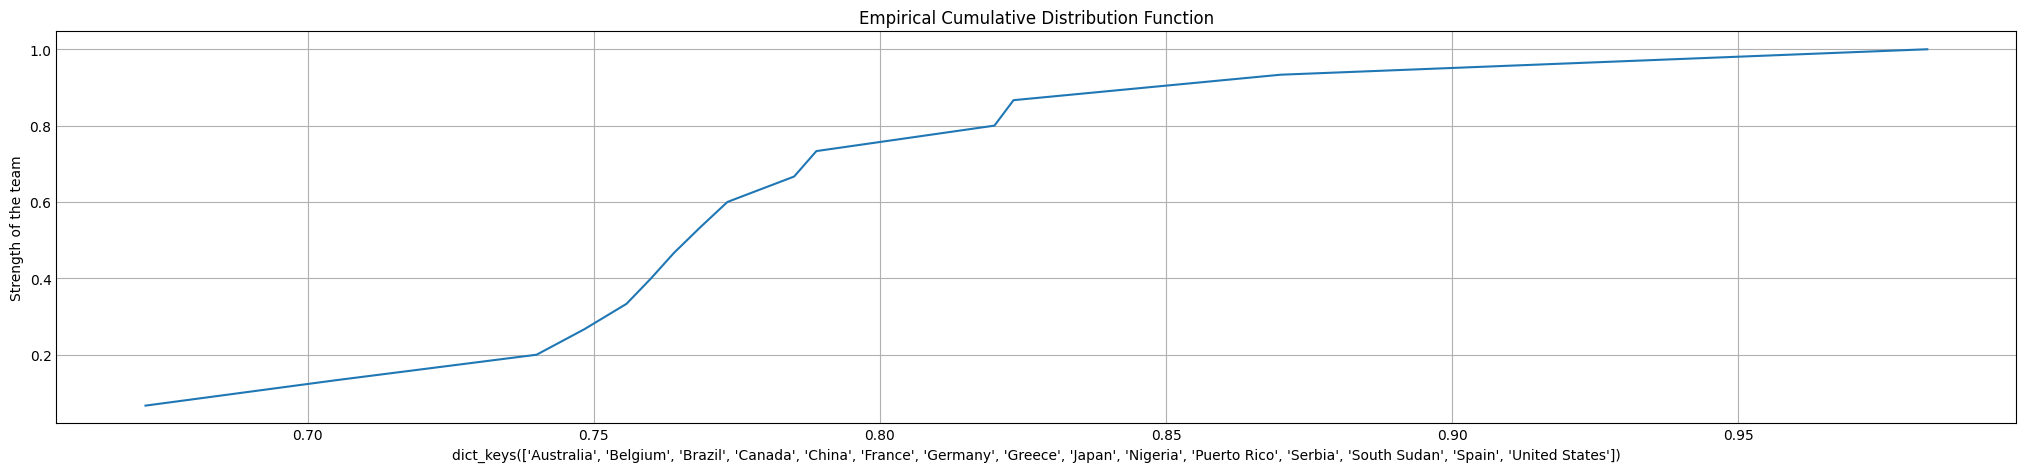

In [5]:
# Which country will be the next world champion:
# By wins - loss / (points - points given ) == Strenght of a team!


wins_team = pd.Series.to_dict((data.groupby("participant_country")["result_WLT"].value_counts().sort_values(ascending=True)))
print(wins_team )


strength_team = pd.Series.to_dict((data.groupby("participant_country")["result"].mean() / 100))
print(strength_team)


# Compute and plot the empirical cumulative distribution function of x.

plt.style.use("_mpl-gallery")

# Extract values from the dictionary for plotting
x_vals = list(strength_team.values())


fig,ax = plt.subplots()
ecdf = ECDF(x_vals)
ax.plot(ecdf.x, ecdf.y)
ax.set(title="Empirical Cumulative Distribution Function")
# X & Y labels for the ECDF
plt.xlabel(strength_team.keys(), )
plt.ylabel("Strength of the team")

# Changing the size of the visualization.
plt.gcf().set_size_inches(20, 4)
plt.show()




"""
  Though the silver medalist was france
  by the records it seems that spain might be the next coming up!
"""




In [6]:
medal_data = pd.read_csv("/content/medals.csv")
medal_data.head()

,medal_type,medal_code,medal_date,name,country_code,gender,discipline,event,event_type,url_event,code
0,Gold Medal,1,2024-07-27,Remco EVENEPOEL,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136
1,Silver Medal,2,2024-07-27,Filippo GANNA,ITA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520
2,Bronze Medal,3,2024-07-27,Wout van AERT,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903147
3,Gold Medal,1,2024-07-27,Grace BROWN,AUS,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1940173
4,Silver Medal,2,2024-07-27,Anna HENDERSON,GBR,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1912525


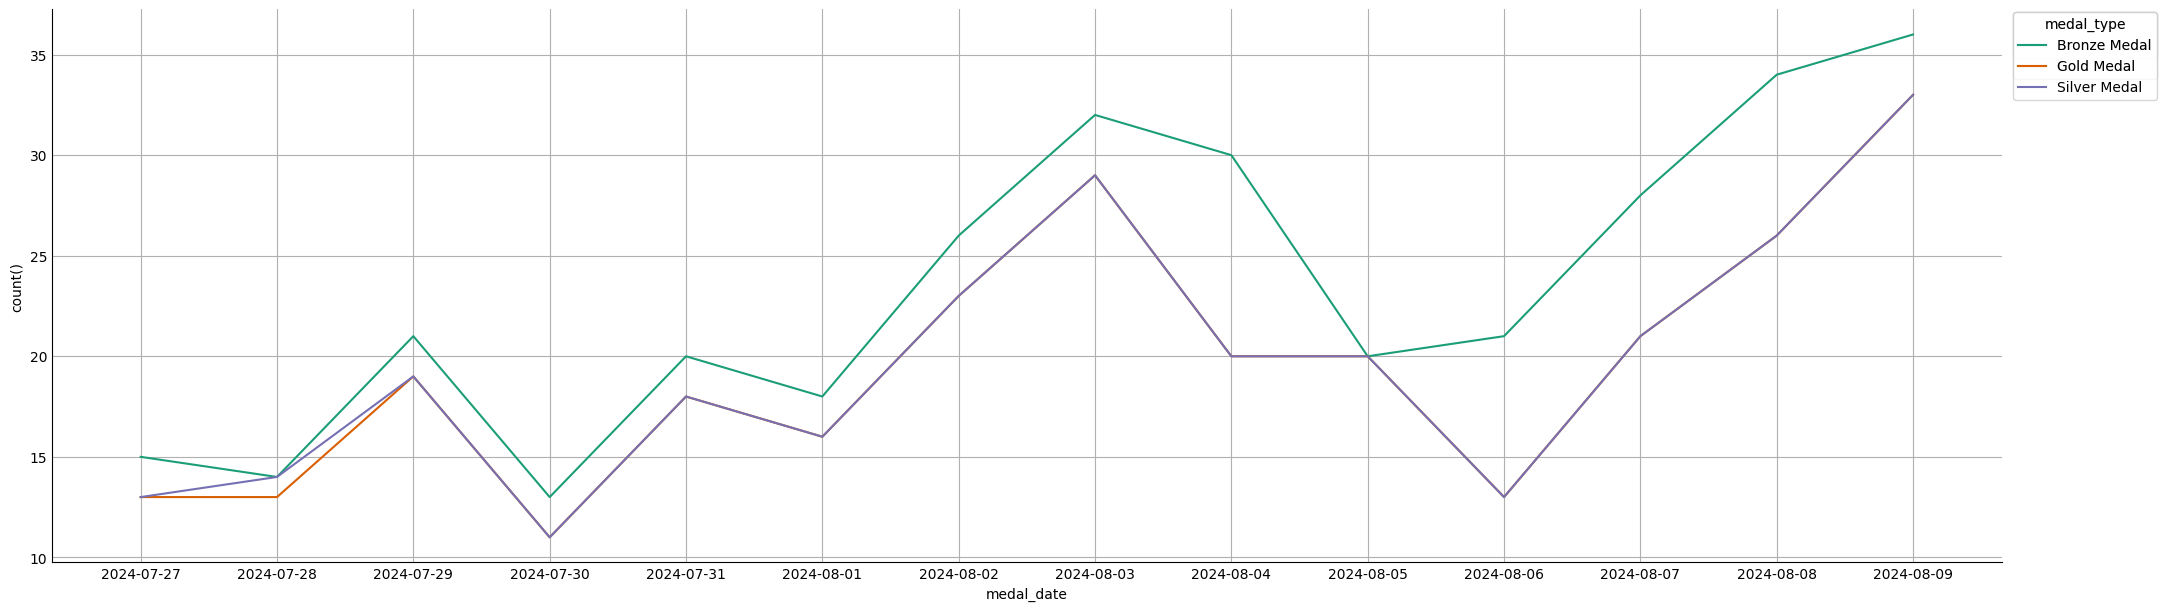

In [7]:
# @title medal_date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['medal_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'medal_date'}, axis=1)
              .sort_values('medal_date', ascending=True))
  xs = counted['medal_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(20, 6), layout='constrained')
df_sorted = medal_data.sort_values('medal_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('medal_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='medal_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('medal_date')
_ = plt.ylabel('count()')

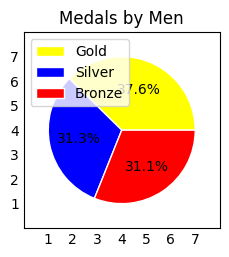

In [8]:
# Which gender won more medal?


gender = medal_data.groupby("gender")["medal_type"].value_counts()

man_medals = gender["M"]
woman_medals = gender["W"]


# Visualize the medals by gender:

# Men
plt.style.use("_mpl-gallery-nogrid")
fix,ax = plt.subplots()
ax.pie(man_medals, colors=["Yellow", "Blue", "Red"], radius=3,center=(4,4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"},autopct="%1.1f%%", frame=True),
labels = "Gold", "Silver", "Bronze"
plt.legend(labels, loc="upper left")
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
plt.title("Medals by Men")

plt.show()





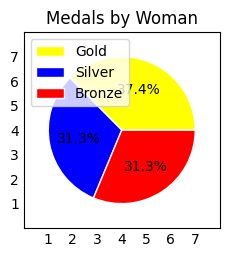

In [9]:
plt.style.use("_mpl-gallery-nogrid")
fix,ax = plt.subplots()

ax.pie(woman_medals, colors=["Yellow", "Blue", "Red"], radius=3,center=(4,4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"},autopct="%1.1f%%", frame=True),
labels = "Gold", "Silver", "Bronze"
plt.legend(labels, loc="upper left")
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
plt.title("Medals by Woman")

plt.show()

discipline  medal_code
Athletics   3             38
            2             37
            1             37
Swimming    2             36
            1             35
                          ..
Breaking    2              1
Golf        1              1
            2              1
            3              1
Football    1              1
Name: count, Length: 118, dtype: int64


<ipython-input-32-b216272cbe02>:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sports_medal, y, label=sports_medal.index, use_line_collection=True)


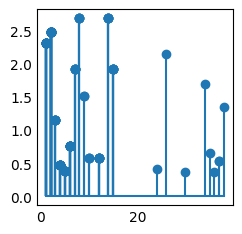

In [32]:
# Which sports won the most medals on the olympics


sports_medal = medal_data.groupby("discipline")["medal_code"].value_counts().sort_values(ascending=False)
print(sports_medal)

# Let's create a visualization to see how this sports spread out.
# We gonna usea team plot

y = np.exp(np.sin(sports_medal))

plt.stem(sports_medal, y, label=sports_medal.index, use_line_collection=True)
plt.show()


